In [74]:
import pandas as pd

# 엑셀 파일 읽기
file_path = ('/aiffel/aiffel/retail.xlsx')
retail = pd.read_excel(file_path, engine='openpyxl')

# 데이터 확인
retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [75]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [76]:
retail['InvoiceDate_DT'] = pd.to_datetime(retail['InvoiceDate'])
retail = retail[retail['Customer ID'].notna()]
retail['Customer ID'] = retail['Customer ID'].astype(np.int64)
retail = retail.sort_values('InvoiceDate_DT')
retail['Total'] = retail['Quantity'] * retail['Price']

In [77]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01 07:45:00,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01 07:45:00,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01 07:45:00,30.0


In [78]:
# 결측치가 있는 고객 ID 제거
retail = retail.dropna(subset=['Customer ID'])

In [79]:
 # InvoiceDate를 기준으로 데이터 정렬
data = data.sort_values(by='InvoiceDate')

# 4. 매출 금액 (Total) 계산
retail['Total'] = retail['Quantity'] * retail['Price']

In [80]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01 07:45:00,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01 07:45:00,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01 07:45:00,30.0


# 나라별 구매인원 시각화

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

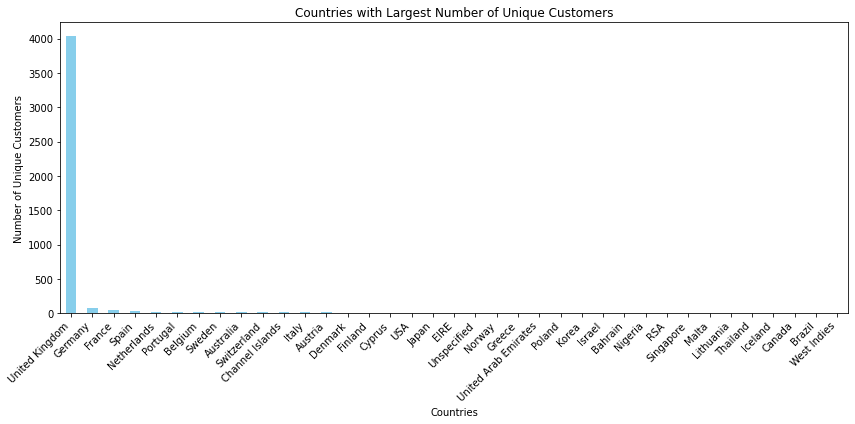

In [82]:
# 2. 데이터 시각화 - 나라별 구매 고객 수 계산
unique_customers_by_country = retail.groupby('Country')['Customer ID'].nunique().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
unique_customers_by_country.plot(kind='bar', color='skyblue')
plt.title('Countries with Largest Number of Unique Customers')
plt.xlabel('Countries')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Acquisition: 고객 유입분석

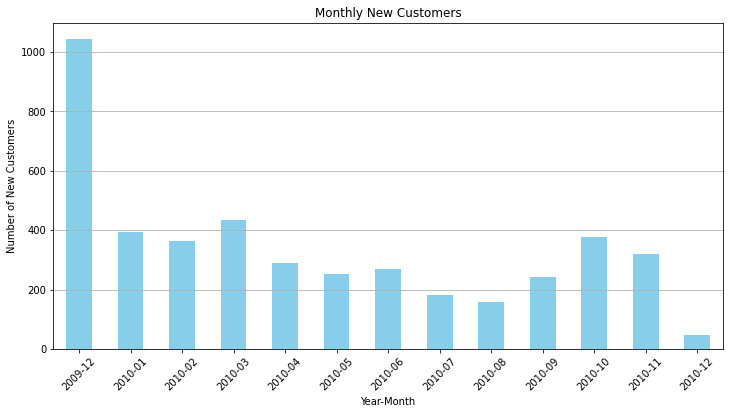

In [83]:
## 1. 'InvoiceDate'를 날짜 형식으로 변환
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

# 2. 'YearMonth' 컬럼 생성 (연-월 기준으로 데이터 집계)
retail['YearMonth'] = retail['InvoiceDate'].dt.to_period('M')

# 3. 고객별 첫 구매 날짜 추출
first_purchase = retail.groupby('Customer ID')['InvoiceDate'].min().reset_index()
first_purchase['YearMonth'] = first_purchase['InvoiceDate'].dt.to_period('M')

# 4. 월별 신규 유입 고객 수 집계
monthly_new_customers = first_purchase['YearMonth'].value_counts().sort_index()

# 5. 결과 시각화
plt.figure(figsize=(12, 6))
monthly_new_customers.plot(kind='bar', color='skyblue')
plt.title("Monthly New Customers")
plt.xlabel("Year-Month")
plt.ylabel("Number of New Customers")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Activation: 고객 활성화 분석

In [84]:
import pandas as pd

# 1. 'InvoiceDate'를 날짜 형식으로 변환
retail['InvoiceDate_DT'] = pd.to_datetime(retail['InvoiceDate'])

# 고객별 첫 구매 날짜 추출
first_purchase = retail.groupby('Customer ID')['InvoiceDate'].min().reset_index()
first_purchase.columns = ['Customer ID', 'First Purchase Date']

# 고객별 총 구매 금액 집계
customer_revenue = retail.groupby('Customer ID')['Total'].sum().reset_index()
customer_revenue.columns = ['Customer ID', 'Total Spend']

# 첫 구매 이후 특정 금액 (£50) 이상 지출한 고객 수 계산
activation_threshold = 50  # 활성화 기준 금액 설정
activated_customers = customer_revenue[customer_revenue['Total Spend'] >= activation_threshold]['Customer ID'].nunique()

# 전체 고객 수와 활성화된 고객 수 계산
total_customers = retail['Customer ID'].nunique()
activation_rate = activated_customers / total_customers

# 결과 출력
print(f"총 고객 수: {total_customers}")
print(f"활성화된 고객 수 (첫 구매 후 £50 이상 지출한 고객): {activated_customers}")
print(f"고객 활성화율: {activation_rate:.2%}")

총 고객 수: 4383
활성화된 고객 수 (첫 구매 후 £50 이상 지출한 고객): 4218
고객 활성화율: 96.24%


# Retention: 코호트 분석 (유저 수)

In [85]:
retail = retail[retail['InvoiceDate_DT'].dt.year != 2009]
retail['InvoiceQuarter'] = ('Q' + retail['InvoiceDate_DT'].dt.quarter.astype(str) +
                            '/' + retail['InvoiceDate_DT'].dt.year.astype(str))
quarters_map = dict(zip(retail['InvoiceQuarter'].unique(),
                        range(len(retail['InvoiceQuarter'].unique()))))
retail['InvoiceQuarterID'] = retail['InvoiceQuarter'].map(quarters_map)
retail['CohortQuarterID'] = retail.groupby('Customer ID')['InvoiceQuarterID'].transform('min')
retail['CohortQuarter'] = retail['CohortQuarterID'].map(dict(zip(quarters_map.values(), quarters_map.keys())))
retail['CohortIndex'] = retail['InvoiceQuarterID'] - retail['CohortQuarterID']

In [86]:
cohort_retention = retail.groupby(['CohortQuarterID', 'CohortIndex'])['Customer ID'].apply(pd.Series.nunique).reset_index()
cohort_retention.rename(columns={'Customer ID': 'Customer Count'}, inplace=True)
cohort_retention_count = cohort_retention.pivot_table(index='CohortQuarterID',
                                                      columns='CohortIndex',
                                                      values='Customer Count')
cohort_retention_count['CohortQuarter'] = cohort_retention_count.index.map(dict(zip(quarters_map.values(),
                                                                                    quarters_map.keys())))
cohort_retention_count = cohort_retention_count.set_index('CohortQuarter')
cohort_size = cohort_retention_count.iloc[:, 0]
retention = cohort_retention_count.divide(cohort_size, axis = 0)
retention = (retention*100).round(2)
retention = retention.iloc[::-1]
retention = retention.loc[cohort_retention_count.index] #인덱스 재정렬
retention

CohortIndex,0,1,2,3
CohortQuarter,,,,
Q1/2010,100.0,61.74,57.4,59.81
Q2/2010,100.0,41.25,45.1,NaN
Q3/2010,100.0,46.84,NaN,NaN
Q4/2010,100.0,NaN,NaN,NaN


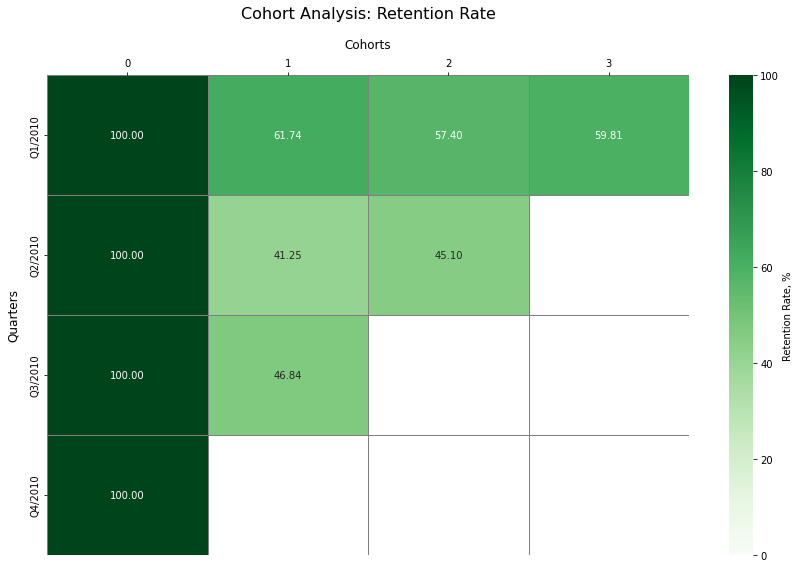

In [87]:
# Seaborn의 heatmap을 사용하여 시각화
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    data=retention,
    annot=True,                # 셀 내부에 값 표시
    fmt='.2f',                 # 텍스트 형식 (소수점 2자리)
    cmap='Greens',             # 색상 팔레트
    cbar_kws={'label': 'Retention Rate, %'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0, vmax=100           # Retention Rate의 범위 설정
)

# 그래프 제목 및 축 레이블 설정
plt.title("Cohort Analysis: Retention Rate", fontsize=16, pad=20)
plt.xlabel("Cohorts", fontsize=12, labelpad=10)
plt.ylabel("Quarters", fontsize=12, labelpad=10)

# x축 레이블을 상단에 표시
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# x축 레이블 각도 조정
plt.xticks(rotation=0, ha='center')

# 시각화 출력
plt.tight_layout()
plt.show()

# Retention: 코호트분석(구매 수량)

In [88]:
cohort_quantity = retail.groupby(['CohortQuarterID', 'CohortIndex'])['Quantity'].mean().reset_index()
cohort_quantity.rename(columns={'Quantity': 'Average Quantity'}, inplace=True)
average_quantity  = cohort_quantity.pivot_table(index = 'CohortQuarterID',
                                                columns = 'CohortIndex',
                                                values = 'Average Quantity').round(1)
average_quantity['CohortQuarter'] = average_quantity.index.map(dict(zip(quarters_map.values(),
                                                                        quarters_map.keys())))
average_quantity = average_quantity.set_index('CohortQuarter')
average_quantity = average_quantity.iloc[::-1]
average_quantity  = average_quantity.loc[cohort_retention_count.index]
average_quantity

CohortIndex,0,1,2,3
CohortQuarter,,,,
Q1/2010,15.5,13.1,14.4,13.1
Q2/2010,10.3,11.2,10.2,NaN
Q3/2010,13.5,7.8,NaN,NaN
Q4/2010,7.6,NaN,NaN,NaN


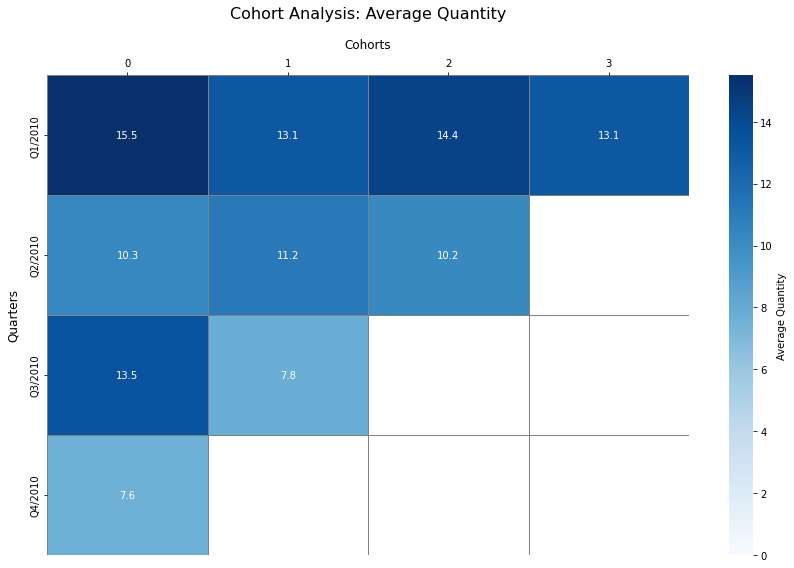

In [89]:
# Seaborn의 heatmap을 사용하여 시각화
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    data=average_quantity,
    annot=True,                # 셀 내부에 값 표시
    fmt='.1f',                 # 텍스트 형식 (소수점 1자리)
    cmap='Blues',              # 색상 팔레트
    cbar_kws={'label': 'Average Quantity'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0                     # 최소값 설정 (필요 시 조정 가능)
)

# 그래프 제목 및 축 레이블 설정
plt.title("Cohort Analysis: Average Quantity", fontsize=16, pad=20)
plt.xlabel("Cohorts", fontsize=12, labelpad=10)
plt.ylabel("Quarters", fontsize=12, labelpad=10)

# x축 레이블을 상단에 표시
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# x축 레이블 각도 조정
plt.xticks(rotation=0, ha='center')

# 시각화 출력
plt.tight_layout()
plt.show()

# Revenue: ARPU 분석

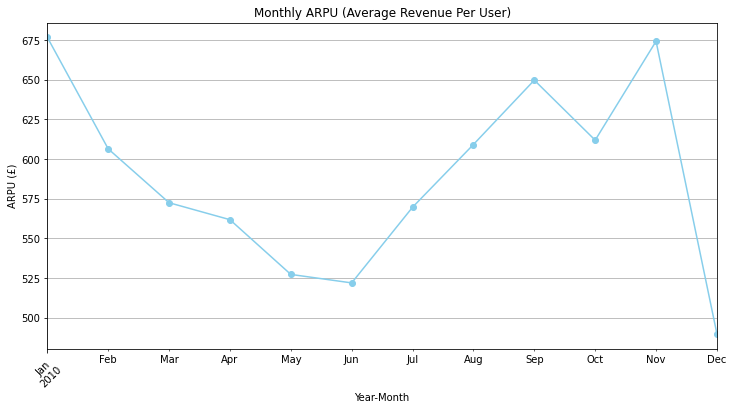

In [90]:
# 1. 'InvoiceDate'를 날짜 형식으로 변환
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

# 2. 결측치가 있는 고객 ID 제거
retail = retail.dropna(subset=['Customer ID'])

# 3. 'Customer ID'를 문자열 형식으로 변환
retail['Customer ID'] = retail['Customer ID'].astype(str)

# 4. 매출 금액 (Total) 계산
retail['Total'] = retail['Quantity'] * retail['Price']

# 5. 'YearMonth' 컬럼 생성 (연-월 단위로 분석)
retail['YearMonth'] = retail['InvoiceDate'].dt.to_period('M')

# 6. 월별 총 매출액과 활성 고객 수 계산
monthly_revenue = retail.groupby('YearMonth')['Total'].sum()
monthly_active_users = retail.groupby('YearMonth')['Customer ID'].nunique()

# 7. ARPU (Average Revenue Per User) 계산
arpu = monthly_revenue / monthly_active_users

# 8. ARPU 시각화
plt.figure(figsize=(12, 6))
arpu.plot(kind='line', marker='o', color='skyblue')
plt.title("Monthly ARPU (Average Revenue Per User)")
plt.xlabel("Year-Month")
plt.ylabel("ARPU (£)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Revenue: CLV 분석

In [91]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,Total,YearMonth,InvoiceQuarter,InvoiceQuarterID,CohortQuarterID,CohortQuarter,CohortIndex
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346,United Kingdom,2010-01-04 09:24:00,22.50,2010-01,Q1/2010,0,0,Q1/2010,0
45229,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590,United Kingdom,2010-01-04 09:43:00,-4.25,2010-01,Q1/2010,0,0,Q1/2010,0
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346,United Kingdom,2010-01-04 09:53:00,22.50,2010-01,Q1/2010,0,0,Q1/2010,0
45238,493414,21527,RETRO SPOT TRADITIONAL TEAPOT,12,2010-01-04 10:28:00,6.95,14590,United Kingdom,2010-01-04 10:28:00,83.40,2010-01,Q1/2010,0,0,Q1/2010,0
45237,493414,35001G,HAND OPEN SHAPE GOLD,2,2010-01-04 10:28:00,4.25,14590,United Kingdom,2010-01-04 10:28:00,8.50,2010-01,Q1/2010,0,0,Q1/2010,0


In [92]:
# 고객별 집계
customer_df = retail.groupby("Customer ID").agg({
    "InvoiceDate": ["min", "max", "count"],
    "Total": ["sum", "mean"]
}).reset_index()

# 컬럼 정리
customer_df.columns = ["Customer ID", "First Purchase", "Last Purchase", "Frequency", "Total Revenue", "Average Revenue"]

# 고객 생애 계산
customer_df["Customer Lifespan (days)"] = (customer_df["Last Purchase"] - customer_df["First Purchase"]).dt.days

# CLV 계산
customer_df["CLV"] = customer_df["Average Revenue"] * customer_df["Frequency"] / (customer_df["Customer Lifespan (days)"]+1)

# 결과 확인
customer_df = customer_df[["Customer ID", "CLV", "Total Revenue", "Frequency", "Customer Lifespan (days)"]]
customer_df = customer_df.sort_values(by="CLV", ascending=False)
customer_df

,Customer ID,CLV,Total Revenue,Frequency,Customer Lifespan (days)
9,12357,12079.99,12079.99,165,0
930,13687,11880.84,11880.84,45,0
4093,18052,10877.18,10877.18,16,0
241,12737,3710.50,3710.50,2,0
536,13139,3138.04,3138.04,95,0
...,...,...,...,...,...
3300,16981,-4620.86,-4620.86,1,0
2418,15760,-5795.87,-5795.87,5,0
2478,15849,-5876.34,-5876.34,1,0
373,12918,-10953.50,-10953.50,3,0


In [94]:
customer_df[customer_df['Customer ID'] == '16981']

,Customer ID,CLV,Total Revenue,Frequency,Customer Lifespan (days)
3300,16981,-4620.86,-4620.86,1,0


# 균등분포 문제

In [ ]:
어떤 회사의 고객 대기시간은 5분에서 15분 사이의 균등분포를 따릅니다. 
고객 100명이 대기한 시간을 시뮬레이션하고, 평균 대기시간과 표준편차를 계산하세요.

In [95]:
import numpy as np

# 시뮬레이션
a, b = 5, 15  # 균등분포의 최소값과 최대값
samples = np.random.uniform(a, b, size=100)

# 평균과 표준편차 계산
mean_waiting_time = np.mean(samples)
std_waiting_time = np.std(samples)

print(f"평균 대기시간: {mean_waiting_time:.2f}")
print(f"표준편차: {std_waiting_time:.2f}")

평균 대기시간: 10.12
표준편차: 3.02


# 베르누이 분포 문제

In [ ]:
한 신제품의 초기 성공 확률이 0.3이라고 가정합니다. 10회의 시뮬레이션에서 성공한 횟수를 구하고, 각 성공 여부를 출력하세요.

In [99]:
from scipy.stats import bernoulli

# 성공 확률
p = 0.3
n_trials = 10

# 베르누이 분포 샘플 생성
outcomes = bernoulli.rvs(p, size=n_trials)
success_count = sum(outcomes)

print(f"시도 결과: {outcomes}")
print(f"성공 횟수: {success_count}")

시도 결과: [1 0 0 1 0 0 0 1 1 0]
성공 횟수: 4


# 이항분포 문제

In [ ]:
한 수업에서 학생 20명이 5문제로 구성된 퀴즈를 치릅니다. 
각 문제의 정답 확률은 0.7이라고 가정할 때, 각 학생이 맞힌 점수를 시뮬레이션하고, 전체 학생의 평균 점수를 계산하세요.

In [97]:
from scipy.stats import binom

# 이항 분포 파라미터
n_questions = 5
p_correct = 0.7
n_students = 20

# 각 학생의 점수 시뮬레이션
scores = binom.rvs(n_questions, p_correct, size=n_students)

# 평균 점수 계산
average_score = np.mean(scores)

print(f"학생별 점수: {scores}")
print(f"평균 점수: {average_score:.2f}")

학생별 점수: [4 4 5 2 3 4 3 4 4 4 3 3 3 3 1 3 3 3 3 3]
평균 점수: 3.25


# 정규분포 문제

In [ ]:
한 공장에서 생산되는 제품의 무게는 평균 50g, 표준편차 5g의 정규분포를 따릅니다.
1000개의 제품 무게를 시뮬레이션하고, 무게가 45g 이상 55g 이하인 제품의 비율을 계산하세요. 무게 분포의 히스토그램을 그리세요.

weights: 샘플 생성하여 저장하는 자료형 변수

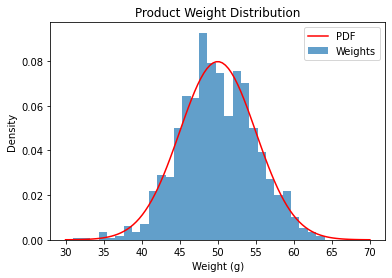

45g 이상 55g 이하 비율: 69.60%


In [100]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# 정규 분포 파라미터
mu, sigma = 50, 5
n_samples = 1000

# 샘플 생성
weights = np.random.normal(mu, sigma, size=n_samples)

# 45g 이상 55g 이하의 비율 계산
lower_bound, upper_bound = 45, 55
within_range = ((weights >= lower_bound) & (weights <= upper_bound)).mean()

# 히스토그램 그리기
plt.hist(weights, bins=30, density=True, alpha=0.7, label="Weights")
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label="PDF")
plt.xlabel("Weight (g)")
plt.ylabel("Density")
plt.title("Product Weight Distribution")
plt.legend()
plt.show()

print(f"45g 이상 55g 이하 비율: {within_range:.2%}")